In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
dataset = pd.read_csv('case_time_series.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             96 non-null     object
 1   Daily Confirmed  96 non-null     int64 
 2   Total Confirmed  96 non-null     int64 
 3   Daily Recovered  96 non-null     int64 
 4   Total Recovered  96 non-null     int64 
 5   Daily Deceased   96 non-null     int64 
 6   Total Deceased   96 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.4+ KB


In [4]:
dataset['date'] = pd.to_datetime(dataset['Date'])

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             96 non-null     object        
 1   Daily Confirmed  96 non-null     int64         
 2   Total Confirmed  96 non-null     int64         
 3   Daily Recovered  96 non-null     int64         
 4   Total Recovered  96 non-null     int64         
 5   Daily Deceased   96 non-null     int64         
 6   Total Deceased   96 non-null     int64         
 7   date             96 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 6.1+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x720 with 0 Axes>

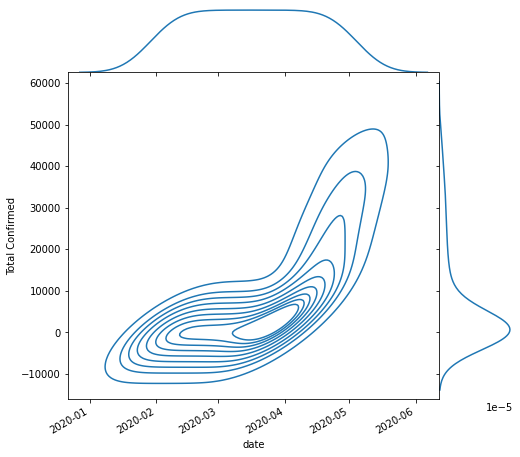

In [6]:
import seaborn as sns
plt.figure(figsize=(20,10))
g = sns.jointplot(dataset['date'],dataset['Total Confirmed'], kind="kde", height=7, space=0)
plt.gcf().autofmt_xdate()
plt.show()

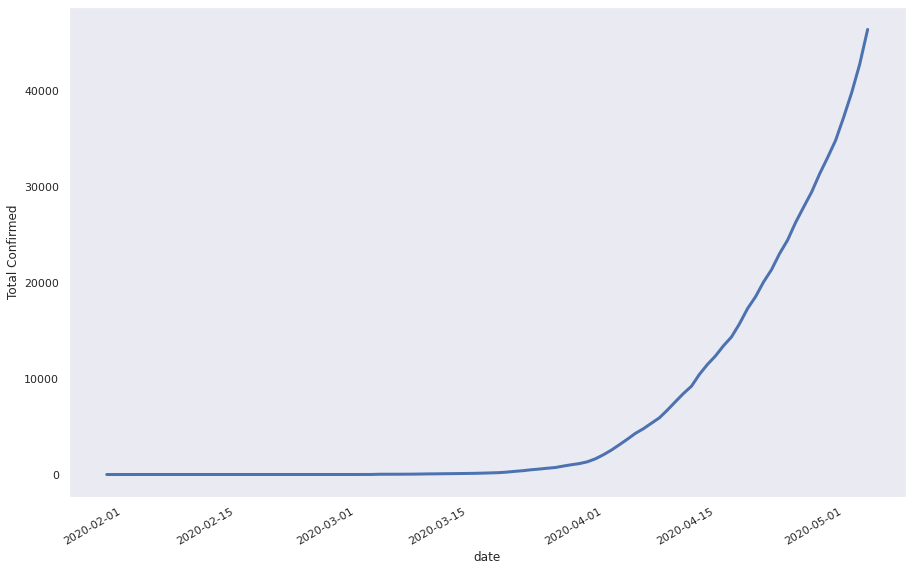

In [7]:
plt.figure(figsize=(15,10))
sns.set(style="dark")
sns.lineplot(x='date', y='Total Confirmed',
             data=dataset,  linewidth=3)
plt.gcf().autofmt_xdate()
plt.show()

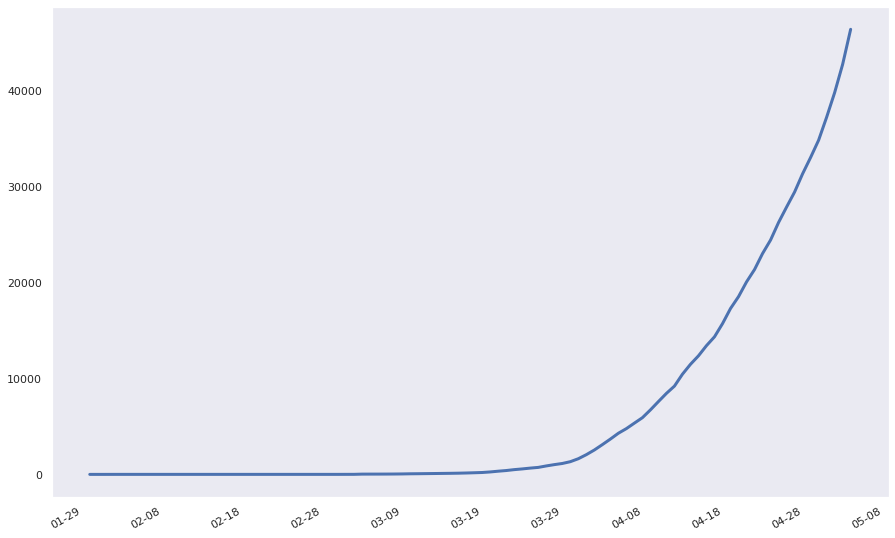

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.plot(dataset['date'],dataset['Total Confirmed'], linewidth=3)
plt.gcf().autofmt_xdate()
plt.show()

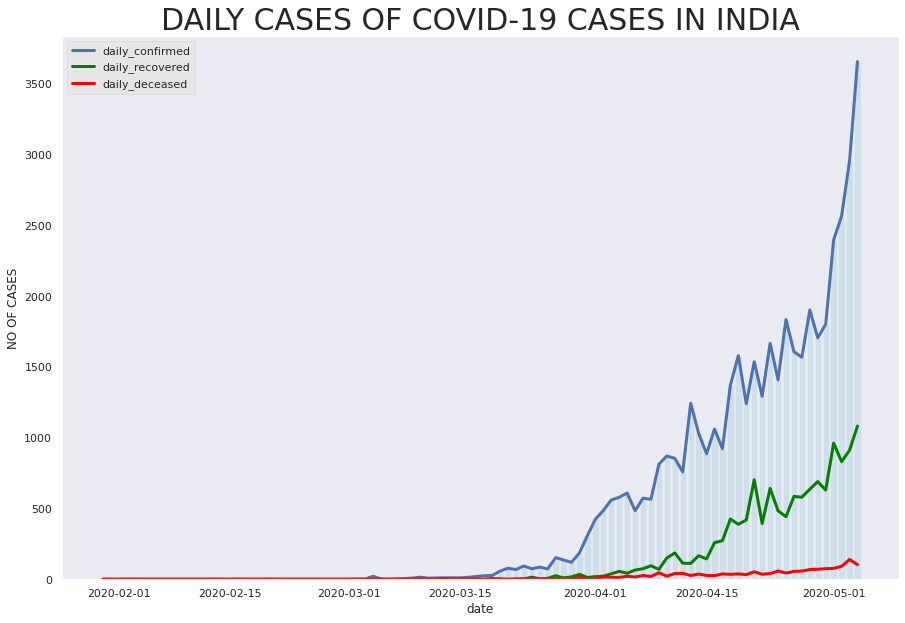

In [9]:
df = dataset.groupby(['date'])[['Daily Confirmed','Daily Recovered','Daily Deceased']].sum()

plt.figure(figsize=(15,10))
plt.title('DAILY CASES OF COVID-19 CASES IN INDIA', fontsize=30)
plt.xlabel('date')
plt.ylabel('NO OF CASES')
plt.plot(df.index,df['Daily Confirmed'], label='daily_confirmed', linewidth=3)
plt.plot(df.index,df['Daily Recovered'], label='daily_recovered', linewidth=3, color='green')
plt.plot(df.index,df['Daily Deceased'], label='daily_deceased', linewidth=3, color='red')
plt.bar(df.index,df['Daily Confirmed'], alpha=0.2, color='c')
plt.style.use('ggplot')
plt.legend()

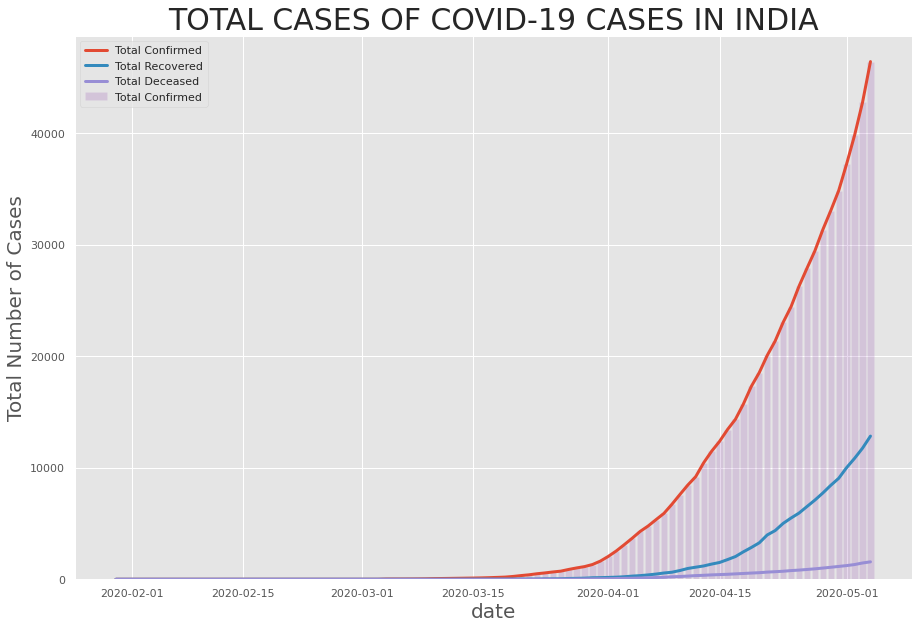

In [10]:
# total cases
df_total = dataset.groupby(['date'])[['Total Confirmed','Total Recovered','Total Deceased']].sum()
plt.figure(figsize=(15,10))
plt.title('TOTAL CASES OF COVID-19 CASES IN INDIA', fontsize=30)
plt.xlabel('date', fontsize=20)
plt.ylabel('Total Number of Cases', fontsize=20)
plt.plot(df_total.index,df_total['Total Confirmed'], label='Total Confirmed',linewidth=3)
plt.plot(df_total.index,df_total['Total Recovered'], label='Total Recovered', linewidth=3)
plt.plot(df_total.index,df_total['Total Deceased'], label='Total Deceased', linewidth=3)
plt.bar(df_total.index,df_total['Total Confirmed'], label='Total Confirmed', alpha=0.2, color='#8E44AD')
plt.style.use('ggplot')
plt.legend(loc='best')

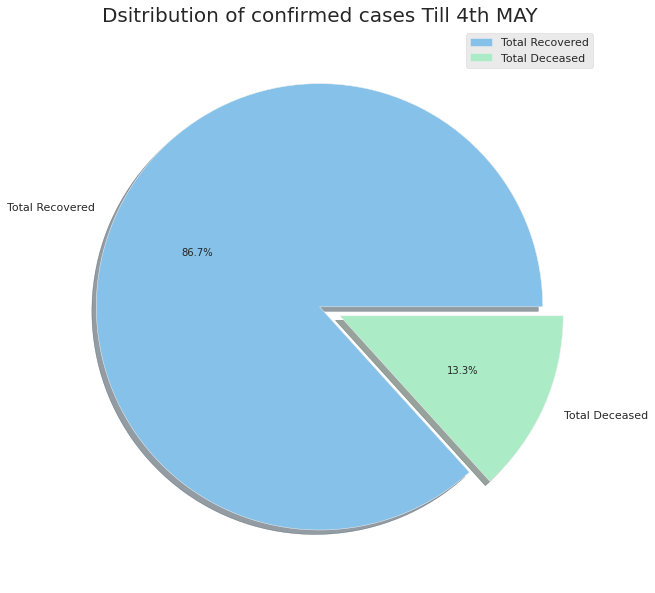

In [11]:
#df
labels = 'Total Recovered','Total Deceased'
recovered = dataset['Total Recovered']
deceased = dataset['Total Deceased']
sizes = [recovered.sum() , deceased.sum()]
explode = [0,0.1]
colors = ['#85C1E9','#ABEBC6']
plt.figure(figsize=(10,20))

plt.title('Dsitribution of confirmed cases Till 4th MAY', fontsize=20)
plt.pie(sizes, autopct='%1.1f%%', labels=labels,explode=explode,colors=colors, shadow=True)
plt.legend(labels, loc='best')
plt.show()

TIME SEREIS ANALYIS FOR UPCOMING NEXT 10 DAYS

In [12]:
df = pd.read_excel('case.xlsx')

In [13]:
df.head()

,date,Total Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3


In [14]:
df = df.set_index(['date'])
df

,Total Confirmed
date,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3
...,...
2020-04-30,34866
2020-05-01,37262
2020-05-02,39826


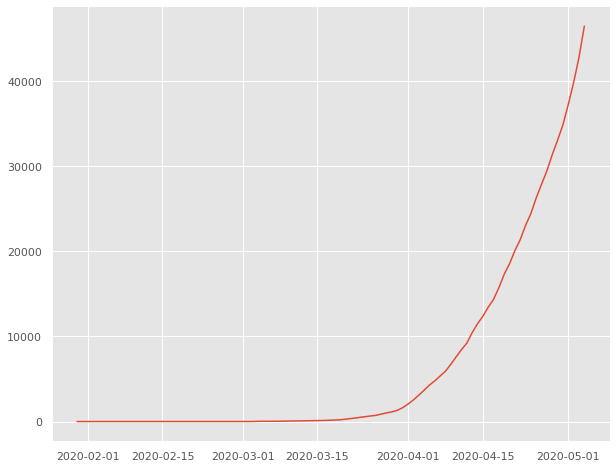

In [15]:
plt.figure(figsize=(10,8))
plt.plot(df)

In [16]:
df.isnull().sum()

Total Confirmed    0
dtype: int64

In [17]:
# rolling mean

rolmean = df.rolling(window=6).mean()
rolstd = df.rolling(window=6).std()

In [18]:
print(rolmean,rolstd)

            Total Confirmed
date                       
2020-01-30              NaN
2020-01-31              NaN
2020-02-01              NaN
2020-02-02              NaN
2020-02-03              NaN
...                     ...
2020-04-30     30487.000000
2020-05-01     32316.833333
2020-05-02     34306.166667
2020-05-03     36526.166667
2020-05-04     39038.500000

[96 rows x 1 columns]             Total Confirmed
date                       
2020-01-30              NaN
2020-01-31              NaN
2020-02-01              NaN
2020-02-02              NaN
2020-02-03              NaN
...                     ...
2020-04-30      3226.785397
2020-05-01      3469.812353
2020-05-02      3827.376042
2020-05-03      4288.143580
2020-05-04      5010.905058

[96 rows x 1 columns]


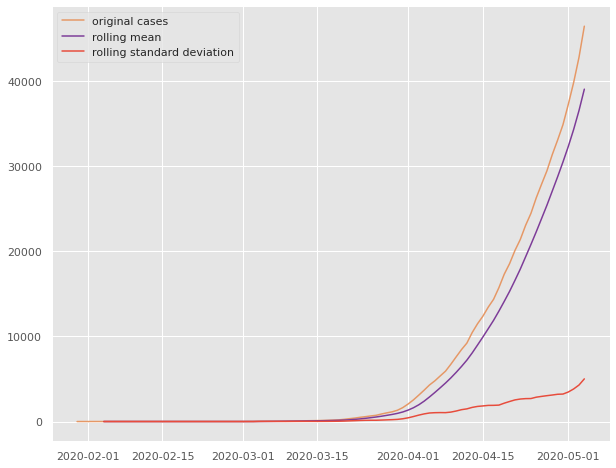

In [19]:
plt.figure(figsize=(10,8))
plt.plot(df, color='#E59866', label='original cases')
plt.plot(rolmean, color='#7D3C98', label='rolling mean')
plt.plot(rolstd, color='#E74C3C', label='rolling standard deviation')
plt.legend(loc='best')
plt.show()

WE WILL DO DICKEY-FULLER TEST TO CHECK STATIONARITY OF DATA AND TO REJECT NULL HYPOTHESIS

In [20]:
from statsmodels.tsa.stattools import adfuller
def test(data):
    rolmean = data.rolling(window=4).mean()
    rolstd = data.rolling(window=4).std()
    plt.figure(figsize=(10,8))
    plt.plot(data, color='#154360', label='original cases')
    plt.plot(rolmean, color='#4A235A', label='rolling mean')
    plt.plot(rolstd, color='#7E5109', label='rolling standard deviation')
    plt.legend(loc='best')
    plt.show()
    
    dftest = adfuller(data['Total Confirmed'], autolag = 't-stat')
    dfoutput = pd.Series(dftest[0:4], index=['test statitics','p_value','lags used','number of observations'])
    for key,value in dftest[4].items():
        dfoutput['critcal value (%s)'%key] = value
        
    print(dfoutput)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


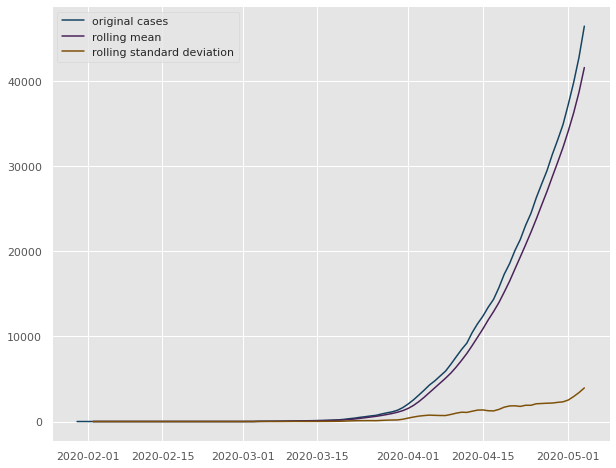

test statitics             4.012370
p_value                    1.000000
lags used                 11.000000
number of observations    84.000000
critcal value (1%)        -3.510712
critcal value (5%)        -2.896616
critcal value (10%)       -2.585482
dtype: float64


In [21]:
test(df)

HERE P_VALUE IS LARGER THAN 0.5 SO WE CANNOT REJECT NULLL HYPOTHESIS THAT DATA IS NOT STATIONARY

TREND ANALYSIS USING LOG TRANSFORMATION

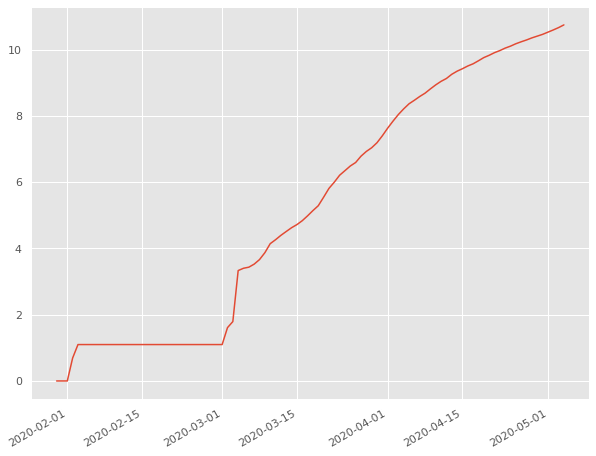

,Total Confirmed
date,
2020-04-30,10.459267
2020-05-01,10.525729
2020-05-02,10.592275
2020-05-03,10.663779
2020-05-04,10.745787


In [22]:
df_log = np.log(df)
plt.figure(figsize=(10,8))
plt.plot(df_log)
plt.gcf().autofmt_xdate()
plt.show()
df_log.tail()

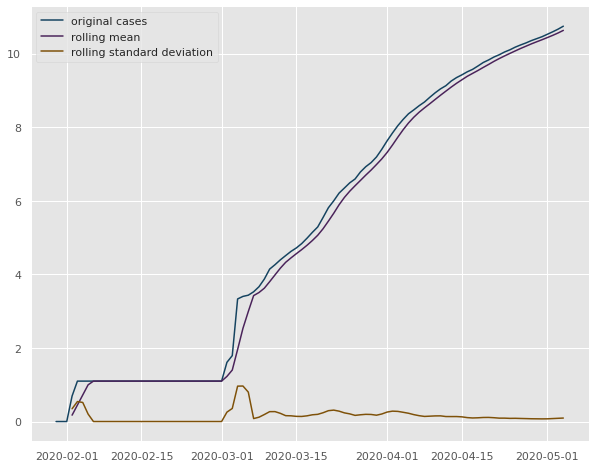

test statitics            -0.395729
p_value                    0.910809
lags used                  2.000000
number of observations    93.000000
critcal value (1%)        -3.502705
critcal value (5%)        -2.893158
critcal value (10%)       -2.583637
dtype: float64


In [23]:
test(df_log)

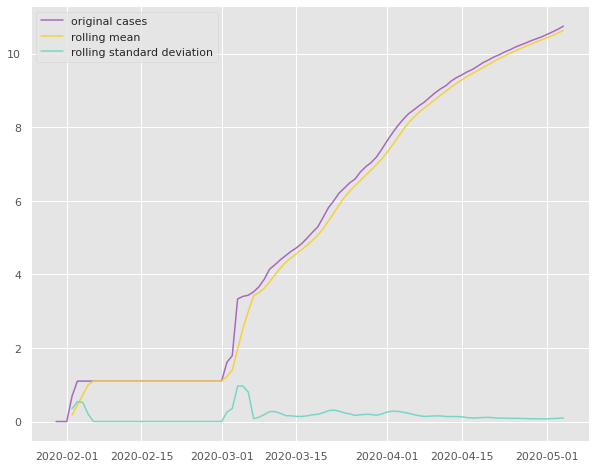

In [24]:
movingaverage = df_log.rolling(window=4).mean()
rolstd = df_log.rolling(window=4).std()
plt.figure(figsize=(10,8))
plt.plot(df_log, color='#A569BD', label='original cases')
plt.plot(movingaverage, color='#F4D03F', label='rolling mean')
plt.plot(rolstd, color='#76D7C4', label='rolling standard deviation')
plt.legend(loc='best')
plt.show()

In [25]:
df_log_minus = df_log - movingaverage
df_log_minus.dropna(inplace=True)
df_log_minus.tail(12)

,Total Confirmed
date,
2020-04-23,0.107412
2020-04-24,0.097628
2020-04-25,0.102715
2020-04-26,0.095526
2020-04-27,0.088789
2020-04-28,0.089111
2020-04-29,0.084665
2020-04-30,0.081891
2020-05-01,0.089600


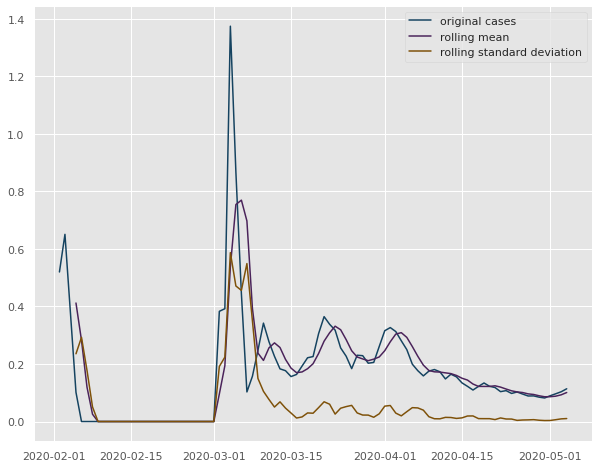

test statitics            -3.161766
p_value                    0.022307
lags used                  3.000000
number of observations    89.000000
critcal value (1%)        -3.506057
critcal value (5%)        -2.894607
critcal value (10%)       -2.584410
dtype: float64


In [26]:
test(df_log_minus)

HERE P_VALUE IS FAR LESS THAN CRITICAL VALUE SO WE CAN REJECT NULL HYPOTHESIS AND WE CAN SAY OUR DATA IS STATIONARY

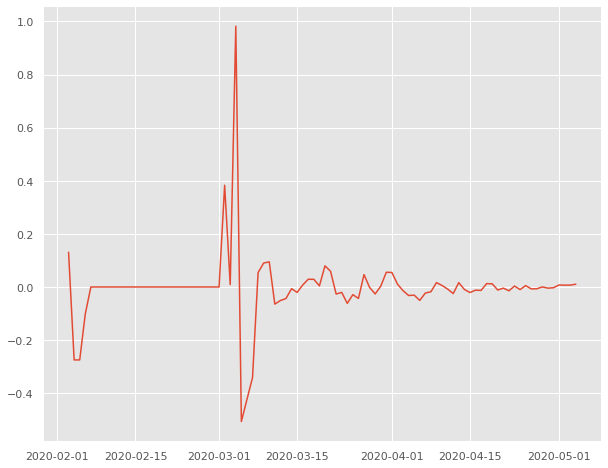

In [27]:
data_shift = df_log_minus - df_log_minus.shift()
plt.figure(figsize=(10,8))
plt.plot(data_shift)

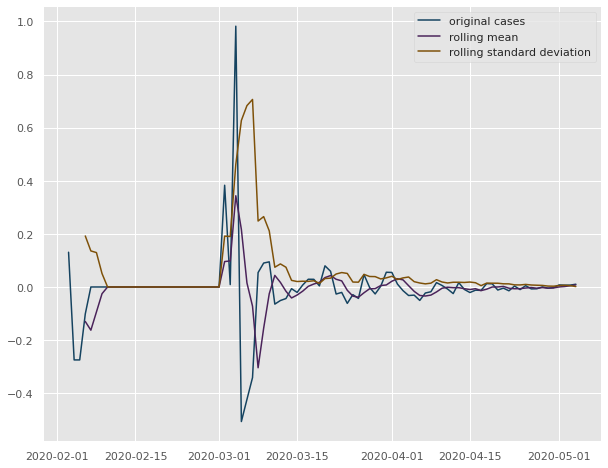

test statitics           -7.915779e+00
p_value                   3.839792e-12
lags used                 2.000000e+00
number of observations    8.900000e+01
critcal value (1%)       -3.506057e+00
critcal value (5%)       -2.894607e+00
critcal value (10%)      -2.584410e+00
dtype: float64


In [28]:
data_shift.dropna(inplace=True)
test(data_shift)

 ARIMA MODEL

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


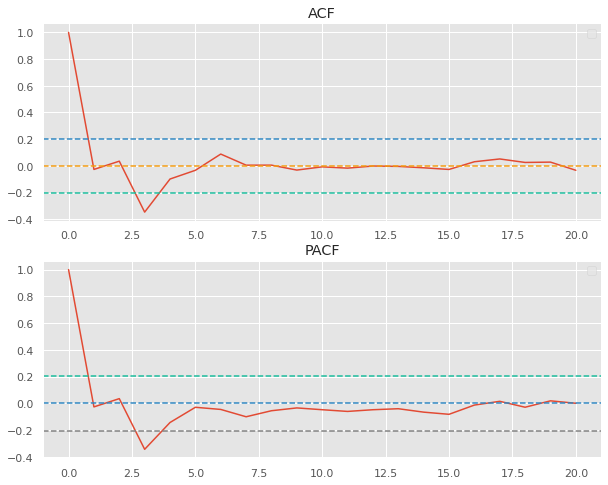

In [29]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data_shift, nlags=20)
lag_pacf = pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(10,8))
#plot acf
plt.subplot(211)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='#F39C12')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)), linestyle='--', color='#1ABC9C')
plt.axhline(y=1.96/np.sqrt(len(data_shift)), linestyle='--', color='#2E86C1')
plt.title('ACF')
plt.legend(loc='best')
#plot pacf
plt.subplot(212)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='#2E86C1')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_shift)), linestyle='--', color='#1ABC9C')
plt.title('PACF')
plt.legend(loc='best')

Text(0.5, 1.0, 'RSS NAN ')

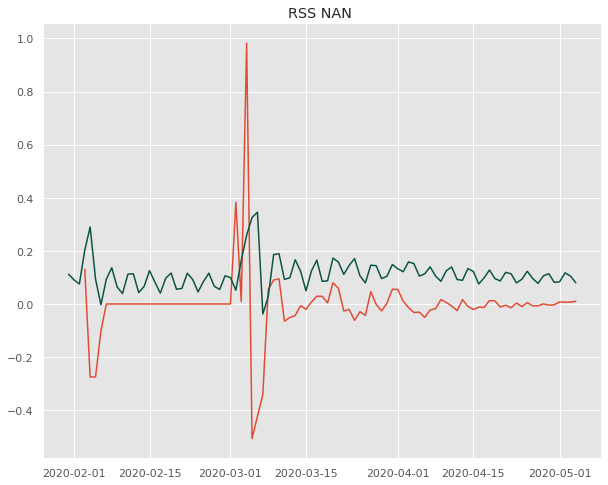

In [30]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(df_log, order=(4,1,4))
result = model.fit(disp=-1)
plt.figure(figsize=(10,8))
plt.plot(data_shift)
plt.plot(result.fittedvalues, color='#0B5345')
plt.title('RSS %-4F'% sum((result.fittedvalues- data_shift['Total Confirmed'])**2))

In [31]:
pred_arima_diff = pd.Series(result.fittedvalues, copy=True)
pred_arima_diff

date
2020-01-31    0.111822
2020-02-01    0.090857
2020-02-02    0.075331
2020-02-03    0.202316
2020-02-04    0.289994
                ...   
2020-04-30    0.081393
2020-05-01    0.083691
2020-05-02    0.117307
2020-05-03    0.105365
2020-05-04    0.079945
Length: 95, dtype: float64

In [32]:
# we will take cumsum
pred_arima_diff_cumsum = pred_arima_diff.cumsum()
pred_arima_diff_cumsum.tail()

date
2020-04-30    10.275610
2020-05-01    10.359300
2020-05-02    10.476608
2020-05-03    10.581973
2020-05-04    10.661918
dtype: float64

In [33]:
prediction = pd.Series(df_log['Total Confirmed'].iloc[0], index=df_log.index)
prediction = prediction.add(pred_arima_diff_cumsum, fill_value=0)
prediction.tail()

date
2020-04-30    10.275610
2020-05-01    10.359300
2020-05-02    10.476608
2020-05-03    10.581973
2020-05-04    10.661918
dtype: float64

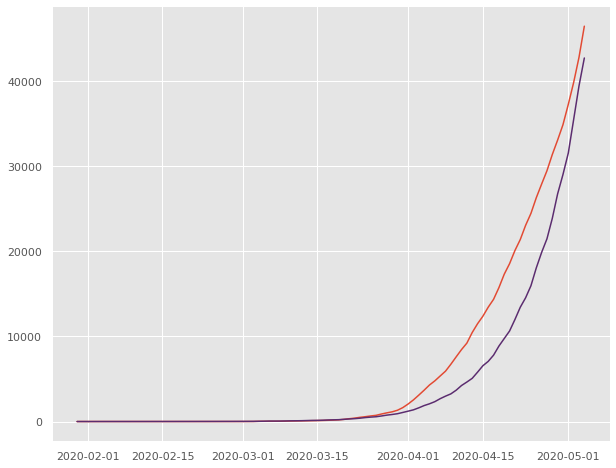

In [34]:
pred = np.exp(prediction)
plt.figure(figsize=(10,8))
plt.plot(df)
plt.plot(pred, color='#5B2C6F')

In [35]:
pred.tail()

date
2020-04-30    29016.203036
2020-05-01    31549.096396
2020-05-02    35475.855199
2020-05-03    39417.796287
2020-05-04    42698.437066
dtype: float64

In [36]:
df

,Total Confirmed
date,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3
...,...
2020-04-30,34866
2020-05-01,37262
2020-05-02,39826


WE WILL DO 10 DAYS PREDICTION 5 MAY TO 15 MAY , 2020

<Figure size 720x576 with 0 Axes>

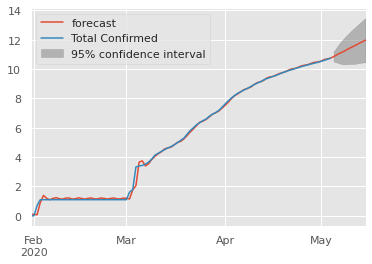

<Figure size 720x576 with 0 Axes>

In [37]:
result.plot_predict(1,106)
plt.figure(figsize=(10,8))

In [38]:
x = result.forecast(steps=10)
x = np.exp(x[0])
for i in x:
    print(i)

51551.879525651806
58614.199216013585
65339.92042814662
72190.31132246905
81328.31701011602
91676.33747288484
101539.5750328058
113172.91371149679
127820.76993398457
142823.88139592283
